# DAT561 Final Project 

#### NOTE: Please be creative in defining the new variables as part of the data manipulation and write your description at the end of each code as the comment. We will read your logic and description for the assessment.

In [1]:
import numpy as np
import pandas as pd

In [2]:
#read the dataset here
Property_details = pd.read_csv('Property_details.csv') # Please use your path and dataset for this parts!
Order_details = pd.read_csv('Order_details.csv', na_values={"onsiteprice":0})

## Question 1

#### Part (a): How many properties are there in the region with the zip code of 84100? 
#### Part (b): What is the mean, standard deviation, median, min, and max of “starratings” for all properties in the region with the zip code of 84100?


In [3]:
#(1a)

# To filter the df, so that only those with the zipcode of 84100 are included.
Property_details.loc[Property_details.zipcode==84100,:].shape[0]

52

In [4]:
#(1b)

Property_84100 = Property_details.loc[Property_details.zipcode==84100, 'starrating']
# 'Property_84100' is a new df that only includes those with the zipcode of 84100, 
# and shows only the 'starrating' column.

print('mean = %0.2f' %Property_84100.mean())
print('standard deviation = %0.2f' %Property_84100.std())
print('median = %0.2f' %Property_84100.median())
print('min = %0.2f' %Property_84100.min())
print('max = %0.2f' %Property_84100.max())

mean = 2.85
standard deviation = 0.75
median = 3.00
min = 2.00
max = 4.00


## Question 2

 #### Part (a): Create a new column called "weekday", which is the day of the “reservation date” in one week (for example, if the reservation date is 2021/10/22, the corresponding value in the new column "weekday" should be “Friday”).
#### Part (b): Which "weekday" does receive the most reservation? 


In [5]:
#(2a)

# Turn 'reservation date' column from object to datetime64[ns]
Order_details['reservation date'] = pd.to_datetime(Order_details['reservation date'])

# Add the new column 'weekday'
Order_details['weekday'] = Order_details['reservation date'].dt.day_name()

Order_details.head()

,id,propertycode,dtcollected,reservation date,los,guests,roomtype,onsiteprice,ratedescription,ratetype,...,maxoccupancy,ispromo,closed,discount,promoname,proxyused,mealinclusiontype,hotelblock,input_dtcollected,weekday
0,50677497,634876,10/12/2019 15:46,2019-11-02,1,1,Double Room,82.36,"Room size: 15 m²/161 ft², Shower, 1 king bed",Cancellation policy,...,1,Y,N,6.24,NaN,media:M3diAproxy@173.44.165.126:80,Free Breakfast,NaN,10/13/2019,Saturday
1,50672149,8328096,10/12/2019 15:47,2019-11-30,1,1,Vacation Home,636.09,"Shower, Kitchenette, 2 bedrooms, 1 double bed ...",Cancellation policy,...,4,N,N,0.00,NaN,media:M3diAproxy@173.44.164.126:80,NaN,NaN,10/13/2019,Saturday
2,50643430,8323442,10/12/2019 15:47,2019-12-20,1,1,Vacation Home,591.74,"Shower, Kitchenette, 2 bedrooms, 1 double bed ...",Extra low price! (non-refundable),...,4,N,N,0.00,NaN,media:M3diAproxy@173.44.166.122:80,NaN,NaN,10/13/2019,Friday
3,50650317,7975,10/12/2019 15:47,2019-12-28,1,1,Standard Triple Room,881.48,"Room size: 20 m²/215 ft², Shower, 3 single beds",Extra low price! (non-refundable),...,1,N,N,0.00,NaN,media:M3diAproxy@209.242.219.141:80,NaN,NaN,10/13/2019,Saturday
4,50650318,7975,10/12/2019 15:47,2019-12-28,1,1,Standard Triple Room,897.53,"Room size: 20 m²/215 ft², Shower, 3 single beds",Extra low price! (non-refundable),...,3,N,N,0.00,NaN,media:M3diAproxy@209.242.219.141:80,Free breakfast for {3},NaN,10/13/2019,Saturday


In [6]:
#(2b)

weekday_freq = Order_details.weekday.value_counts().sort_values(ascending=False)
# 'weekday_freq' is a Series that shows the number of reservations on each weekday,
# in the descending order of number of reservations.

most_freq_weekday = weekday_freq.index[0]
# 'most_freq_weekday' 

print('%s receives the most reservation.' %most_freq_weekday)

Thursday receives the most reservation.


## Question 3

#### Part (a): In “roomamenities”, what are the top 10 common room amenities? What about the 10 least common room amenities? ( for example, Air conditioning is one amenity)
#### Part (b): What percentage does each type of room amenities occupy of the total number of reservations for all properties?（do not use the total number of amenities as denominator）


In [7]:
#3(a)

amenities = [str(row.roomamenities).lower().strip(': ;').split(': ;') \
            for index, row in Order_details.iterrows()]
# 'amenities' is a list that shows all the amenities in Order_details.csv, repeated,
# and each property shows as a sublist.

amenity_common = {}
# 'amenity_common' is a dictionary whose keys are amenities,
# and values are the numbers of times the amenities appear in Order_details.csv

for Property in amenities:
    for amenity in Property:
        if amenity not in amenity_common:
            amenity_common[amenity] = 1
        else:
            amenity_common[amenity] += 1

amenity_common_desc = sorted(amenity_common.items(), key=lambda item: item[1], reverse=True)
# 'amenity_common_desc' is a list of tuples; each tuple contains an amenity and its frequency,
# 'amenity_common_desc' is in the descending order of the frequency.

top_10_amenities = amenity_common_desc[:10]
# 'top_10_amenities' shows the top 10 common room amenities.

bottom_10_amenities = amenity_common_desc[-10:]
# 'bottom_10_amenities' shows the 10 least common room amenities.

print('The top 10 amenities are %s' %top_10_amenities)
print('---------------------------------------------------------')
print('The bottom 10 amenities are %s' %bottom_10_amenities)

The top 10 amenities are [('air conditioning', 161054), ('in-room safe box', 161054), ('free wi-fi in all rooms!', 157613), ('hair dryer', 127316), ('toiletries', 119993), ('heating', 119196), ('desk', 114593), ('telephone', 113827), ('closet', 113368), ('towels', 106225)]
---------------------------------------------------------
The bottom 10 amenities are [('wi-fi [free]', 196), ('in-room tablet', 161), ('air purifier', 103), ('first aid kit', 98), ('internet access �?lan', 72), ('tv [in bathroom]', 58), ('humidifier', 45), ('vending machine', 24), ('hot tub', 13), ('open air bath privileges', 12)]


In [8]:
#3(b)

tal_reservation = Order_details.shape[0]
# 'tal_reservation' is the total number of reservations for all properties.

amenity_ratio = {}
# 'amenity_ratio' is a dictionary whose keys are amenities,
# and values are the percentage each amenity occupies of the total number of reservations
# for all properties.

for amenity in amenity_common:
    amenity_ratio[amenity] = round(amenity_common[amenity]/tal_reservation, 6)

amenity_ratio

{'air conditioning': 0.970948,
 'alarm clock': 0.240883,
 'carpeting': 0.429178,
 'closet': 0.683463,
 'coffee/tea maker': 0.473748,
 'desk': 0.690848,
 'dvd/cd player': 0.040585,
 'fan': 0.122974,
 'free wi-fi in all rooms!': 0.950203,
 'hair dryer': 0.767551,
 'heating': 0.718598,
 'in-room safe box': 0.970948,
 'ironing facilities': 0.415842,
 'linens': 0.467333,
 'mini bar': 0.31154,
 'seating area': 0.255726,
 'toiletries': 0.723403,
 'towels': 0.6404,
 'tv [flat screen]': 0.168846,
 'fireplace': 0.010767,
 'full kitchen': 0.022782,
 'high chair': 0.025899,
 'microwave': 0.040326,
 'separate dining area': 0.05919,
 'sofa': 0.16635,
 'tv': 0.184497,
 'washing machine': 0.011913,
 'dishwasher': 0.014252,
 'refrigerator': 0.184292,
 'clothes rack': 0.298445,
 'daily housekeeping': 0.197,
 'internet access �?wireless': 0.003412,
 'satellite/cable channels': 0.617605,
 'telephone': 0.68623,
 'on-demand movies': 0.095579,
 'wake-up service': 0.544597,
 'wooden/parqueted flooring': 0.145

## Question 4

#### Part (a): For each property, there are some abnormal values of 0 in the “onsiteprice”. To better organize the data, you would like to create a new column “replaced onsiteprice” in the dataset by retaining the original non-zero “onsiteprice” of one specific property and replacing the zero value with its median of non-zero “onsiteprice”.

#### Part (b): For each property, calculate the maximum and minimum value of “replaced onsiteprice”, and store these two into corresponding two columns named “Maximum” and “Minimum”. Then create a column named “Normalized Maximum” to store the normalized form of the “Maximum” column. You can use the formula below for the normalization (do not round the result). Store the “hotelcode”, “Maximum”, “Minimum”, “Normalized Maximum” to "Mx_Min Price.csv". 
$ X_{norm} = \frac{X-X_{min}}{X_\max-X_{min}}$

In [9]:
#4(a)

# Add the 'replaced onsiteprice' column, to replace NaN value.
Order_details['replaced onsiteprice'] = Order_details.groupby(by=['propertycode']).onsiteprice\
                                                     .transform(lambda x: x.fillna(x.median()))

# To show the replace result, we list only 'onsiteprice' & 'replaced onsiteprice' columns,
# and we filtered to show only NaN in 'onsiteprice'.
Order_details.loc[Order_details.onsiteprice.isnull()==1,['onsiteprice','replaced onsiteprice']]

,onsiteprice,replaced onsiteprice
60,NaN,100.320
77,NaN,100.320
134,NaN,128.595
135,NaN,128.595
158,NaN,180.835
...,...,...
165794,NaN,101.370
165795,NaN,101.370
165797,NaN,73.770
165798,NaN,73.770


In [10]:
#4(b)

import numpy as np

def max_min(group):
    result = {'Maximum':np.max(group['replaced onsiteprice']),\
              'Minimum':np.min(group['replaced onsiteprice'])}
    return pd.Series(result)

df_Mx_Min = Order_details.groupby(by=['propertycode']).apply(max_min).copy()
# 'df_Mx_Min' is a new dataframe that we store the Maximum & Minimum of replaced onsiteprice.

# To transform the propertycode from index to a column.
df_Mx_Min.reset_index(inplace=True)

# To change the column name from 'propertycode' to 'hotelcode'.
df_Mx_Min.rename(columns={'propertycode':'hotelcode'}, inplace=True)

Max_max = float(df_Mx_Min.Maximum.max()) # 'Max_max' is the max of 'Maximum' column.
Max_min = float(df_Mx_Min.Maximum.min()) # 'Max_min' is the min of 'Maximum' column.

# To create a new column 'Normalized Maximum'.
df_Mx_Min['Normalized Maximum'] = (df_Mx_Min.Maximum-Max_min)/(Max_max-Max_min)

# To store the df to 'Mx_Min Price.csv'.
df_Mx_Min.to_csv('/Users/rosazhu/Desktop/Python/Final/Mx_Min Price.csv', \
                 index=False, header=True)

df_check_Mx_Min = pd.read_csv('/Users/rosazhu/Desktop/Python/Final/Mx_Min Price.csv')
# 'df_check_Mx_Min' is a df to check if 'Mx_Min Price.csv' was correctly written.

df_check_Mx_Min

,hotelcode,Maximum,Minimum,Normalized Maximum
0,31,374.73,219.52,0.020083
1,56,149.51,73.46,0.007620
2,97,468.83,259.76,0.025290
3,138,321.84,169.66,0.017156
4,147,226.18,122.90,0.011863
...,...,...,...,...
9092,8965616,109.50,79.37,0.005406
9093,8965903,176.03,176.03,0.009088
9094,8970542,60.28,50.23,0.002683
9095,8971223,100.32,100.32,0.004898


## Question 5

#### Part (a): A family of three is planning a trip. How many available hotels do offer a room with the “maxoccupancy” of 3 or more? Available hotel are those whose “propertype” are “Hotels”, “close” are “N”, and “hotelblock” are not “sold out” .
#### Part (b): If this family does not want to pay a room for a “replaced onsiteprice” higher than 150 per night, how many hotels are still available? Use the maximum of “replaced onsiteprice” to compare with 150 due to price fluctuation. 


In [11]:
#5(a) 

df_filter_1 = Property_details.loc[(Property_details.propertytype=='Hotels'),['propertyid']]
# 'df_filter_1' is a df that contains only properties whose “propertype” are “Hotels”.

df_filter_2 = df_filter_1.drop_duplicates(keep='first',subset=['propertyid'])
# 'df_filter_2' is a df that makes the 'propertyid' in 'df_filter_1' distinct.

filter_list_1 = [row.propertyid for index, row in df_filter_2.iterrows()]
# 'filter_list_1' is a list that stores all 'propertyid's in 'df_filter_2'.

df_family = Order_details.loc[(Order_details.closed=='N') \
                              & (Order_details.hotelblock!='Sold out') \
                              & (Order_details.maxoccupancy>=3) \
                              & (Order_details.propertycode.isin(filter_list_1)), \
                              ['propertycode','maxoccupancy','closed','hotelblock']]\
                         .drop_duplicates(keep='first',subset=['propertycode'])
# 'df_family' is a df that filters 'Order_details' df, and make distinct the 'propertycode'.

# Below shows the number of hotels available.
df_family.shape[0]

3085

In [12]:
#5(b)

df_filter_3 = df_check_Mx_Min.loc[df_check_Mx_Min.Maximum<=150,['hotelcode']]\
                             .drop_duplicates(keep='first')
# 'df_filter_3' is a df that filters out those max[onsiteprice] > 150.
# Even though 'hotelcode' should be distinct in 'df_check_Mx_Min',
# we still redid a 'drop_duplicates' to make sure it was distinct.

filter_list_2 = [row.hotelcode for index, row in df_filter_3.iterrows()]
# 'filter_list_2' is a list that stores all 'hotelcode's in 'df_filter_3'.

# Below shows the number of hotels available.
df_family.loc[df_family.propertycode.isin(filter_list_2),:].shape[0]

1372

## Bonus Question (merge data, filter, groupby, merge three times)
####  Part (a): For each country, find the most expensive property by using “replaced onsiteprice”. Provide id, name, city, country, zip code, address, and average “replaced onsiteprice” of these properties.
#### Part (b): For each country, find the cheapest property by using “replaced onsiteprice”. Provide id, name, city, country, zip code, address, and average “replaced onsiteprice” of these properties.

#### Hint: Each country has numbers of hotels, and each hotel has numbers of prices due to price fluctuation. You need to find the average “replaced onsiteprice” for each hotel first, and sort out the cheapest and the most expensive hotels then.



In [13]:
#(a) 
df_add_country = Order_details.merge(Property_details, how='left', left_on='propertycode', right_on='propertyid')\
                 .loc[:,['propertyid','propertyname','city','country','zipcode','address','replaced onsiteprice']]
# 'df_add_country' is a DF that left join 'Order_details' and 'Property_details',
# to add country and other address information to the table that have the 'replaced onsiteprice' column.

df_group_coutry = df_add_country.groupby(by=['country','propertyid']).agg({'propertyname':np.max,'city':np.max,\
                                                                           'zipcode':np.max,'address':np.max,\
                                                                           'replaced onsiteprice':np.mean})
# 'df_group_country' is a DF to get the 'avg replaced onsiteprice' for each property.

df_group_coutry.reset_index(inplace=True)

# Below is to make 'avg replaced onsiteprice' descending for each country.
df_group_coutry.sort_values(by=['country','replaced onsiteprice'], inplace=True, ascending=[True,False])

df_most_expensive = df_group_coutry.drop_duplicates(keep='first', subset=['country'])
# 'df_most_expensive' is the final DF to list the most expensive property for each country.

df_most_expensive.reset_index(inplace=True, drop=True)

df_most_expensive

,country,propertyid,propertyname,city,zipcode,address,replaced onsiteprice
0,Austria,130055,Superior Alpine Wellnesshotel Karwendel,Pertisau,6213.0,Nr. 54a,655.020000
1,Belgium,49541,Hotel Roosendaelhof,Geel,2440.0,Stationsstraat 50,403.902979
2,Bulgaria,7503033,Aspen Golf and Ski Resort,Razlog,2760.0,Betolovoto Aspen Golf,1072.850000
3,Croatia,112561,Hotel Marmont - Adults Only,Split,21000.0,Zadarska 13,920.066216
4,Cyprus,152681,Hilton Park Nicosia Hotel,Egkomi,NaN,"1 Achaion Street,",304.798466
5,Czech Republic,367192,Hotel Bila Ruze,Strakonice,38601.0,Palackeho Namesti 80,676.515714
6,Denmark,6720996,The Square,Copenhagen,NaN,Radhuspladsen 14,288.985946
7,Estonia,2202,Radisson Blu Sky Hotel Tallinn,Tallinn,10143.0,Ravala Street 3,200.326364
8,Finland,365601,HavsVidden Resort,Geta,22340.0,Havsviddsvagen 90,512.370000
9,France,442720,Hotel Astrid,Lourdes,65100.0,Place Merlasse,11367.060000


In [14]:
#(b) 
df_cheapest = df_group_coutry.drop_duplicates(keep='last', subset=['country'])
# 'df_cheapest' is the final DF to list the cheapest property for each country.

df_cheapest.reset_index(inplace=True, drop=True)

df_cheapest

,country,propertyid,propertyname,city,zipcode,address,replaced onsiteprice
0,Austria,6537481,Dolomitenhotel,Lienz,9900.0,2 Dolomitenstrasse,12.060000
1,Belgium,174732,Hotel Royal Astrid,Aalst,9300.0,Keizersplein 27,54.589286
2,Bulgaria,449128,Family Hotel Natalis,Hisarya,4180.0,20 Geo Milev Str.,18.826667
3,Croatia,1177961,The Movie Hotel Zagreb,Zagreb,10000.0,Savska cesta,41.282000
4,Cyprus,184567,Bellapais Monastery Village,Ozankoy,9944.0,Bellapais Yolu Girne,35.880769
5,Czech Republic,390933,Hotel Praded Jesenik,Jesenik,79001.0,Dukelska 178,14.800000
6,Denmark,6629907,Zleep Hotel Aarhus Nord,Aarhus,8200.0,Tangen 45,58.844000
7,Estonia,7621602,ibis Tallinn Center,Tallinn,10132.0,Juhkentali 28,84.365714
8,Finland,887106,Kempeleen Moottorimaja,Kempele,90440.0,Sohjanantie 3,51.378571
9,France,7600445,Studio Moncoeur,Le Blanc,36300.0,31 Rue du Docteur Fardeau,33.150000


## Part 2 (9 Points):

For this part, we look at the logic and how you solve the problems. 

***Part 2-a:*** 

    1- You need to find "5" interesting business questions based on the datasets.     
    2- Write Python code to answer the questions.    
    3- Visualize your results. 
    

***Part 2-b:***

    Write a 300-word summary of your answers and business insights you get from answering these 5 questions based on your code. Ensure that you have clearly explained why we should care about your questions and your results. Clearly explain your findings.   

***This part will be evaluated based on the following criteria:***

    1. You need to ask five business-relevant questions. (2 points)
    2. You need to answer these five questions using Python and the datasets. (2 points)
    3. You need to have at least "5" graphs to visualize your insights. (2 points)
    4. Your executive summary of your answers is well-written and makes sense. (2 points)
    5. Your business insights are very interesting and the report is creative. (1 points)


**(You need to use this cell to write your 5 questions)**

### We set the five questions to observe how hotels perform during Christmas and New Year; and how guests react, to further give recommendations to hotels.

(For the below 5 questions, we ignore the 'sold-out' orders, and focus on the successed orders only.)

**Question 1: Use line plot to show how the room prices change during Christmas and New Year (compare to usual). Use ‘reservation date’ and avg ‘replaced onsiteprice’.**

**Question 2: Use line plot to show how discount rate change during Christmas and New Year. Use ‘reservation date’ and avg ‘discount’.** Note: Add the discount line plot to the onsiteprice plot in Question 1.

**Question 3: Analyze the number of guests in each country during Christmas and New Year. Where the number of guests is large, we suggest hotels to expand there. Show the result in a horizontal bar plot.** (For this question and below, we def 'during Christmas and New Year' as 'from 12/18/2019 to 12/31/2019', using the result of Question 1&2.)

**Question 4: Classify Meal inclusion, Rate type and Room amenities. Each class equals one point, and add up all the points in the three columns as a ‘total service score’. And further build a column called 'service class' to make ‘total service score’ into less categories for better observation. Get the pie plots to show relation between ‘Service Score’ and Christmas-or-usual, to discover the percentage change.** Note: classify the Meal inclusion before getting meal score.

**Question 5: Similar to Question 4, we want to see if guests will book larger-size room during Christmas and New Year than usual. (Due to a small part of lack of room-size information, we ignore those rows.)**


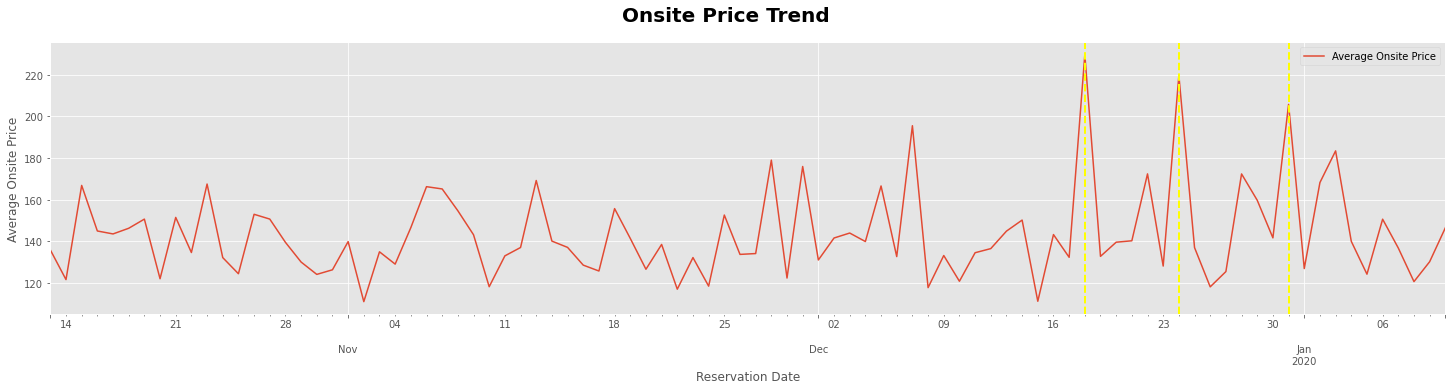

In [15]:
# Your code to answer Question 1

df_Success = Order_details.loc[Order_details.closed=='N',:].copy()
# 'df_Success' is a DF that filters out the 'sold-out' orders. We will use it as a base DF for the 5 questions.



'''To get the data for line plot'''

df_price_date = pd.DataFrame(df_Success.groupby(by=['reservation date'])['replaced onsiteprice'].mean())
# 'df_price_date' is a DF to get the average price for each reservation date.

df_price_date.reset_index(inplace=True)



'''To create the line plot'''

import matplotlib.pyplot as plt

plt.style.use('ggplot')
fig,ax = plt.subplots(figsize=[25,5])

df_price_date.plot(kind='line', y='replaced onsiteprice', x='reservation date', label='Average Onsite Price', ax=ax)
fig.suptitle('Onsite Price Trend', fontsize=20, fontweight='bold')
ax.set(xlabel='Reservation Date', ylabel='Average Onsite Price')
ax.axvline(x='12/18/2019', color='yellow', linestyle='--', linewidth=2)
ax.axvline(x='12/24/2019', color='yellow', linestyle='--', linewidth=2)
ax.axvline(x='12/31/2019', color='yellow', linestyle='--', linewidth=2)


Text(0.5, 0.98, 'Onsite Price vs. Discount rate')

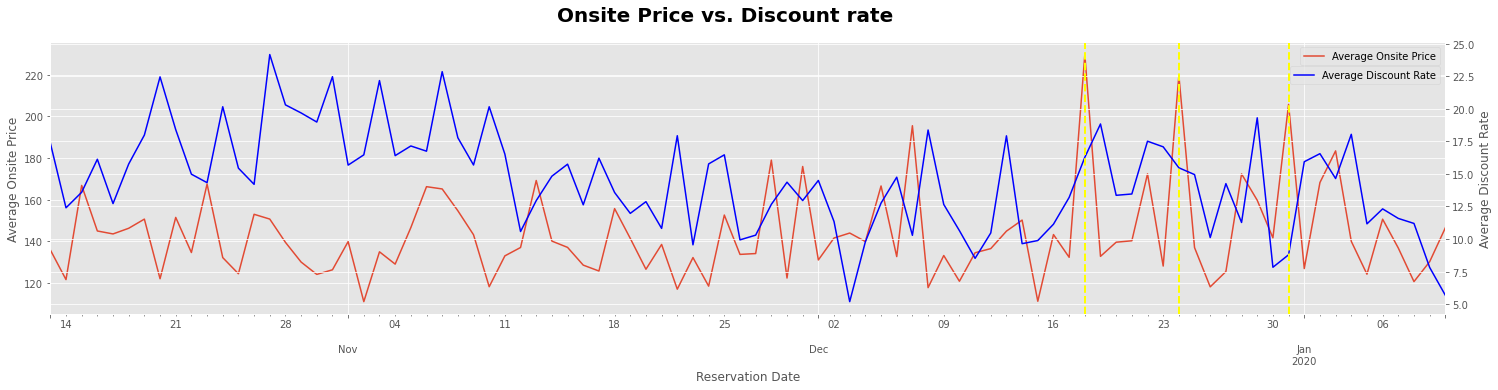

In [16]:
# Your code to answer Question 2

'''To get the data for line plot'''

df_discount_date = pd.DataFrame(df_Success.groupby(by=['reservation date'])['discount'].mean())
# 'df_discount_date' is a DF to get the average discount rate for each reservation date.

df_discount_date.reset_index(inplace=True)



'''To create the line plot'''

fig,ax0 = plt.subplots(figsize=[25,5])
ax1 = ax0.twinx()

df_price_date.plot(kind='line', y='replaced onsiteprice', x='reservation date', label='Average Onsite Price', ax=ax0)
ax0.legend(bbox_to_anchor=(1,1))
ax0.set(xlabel='Reservation Date', ylabel='Average Onsite Price')

df_discount_date.plot(kind='line', y='discount', x='reservation date', label='Average Discount Rate', color='b', \
                      ax=ax1)
ax1.legend(bbox_to_anchor=(1,0.93))
ax1.set(xlabel='Reservation Date', ylabel='Average Discount Rate')
ax1.axvline(x='12/18/2019', color='yellow', linestyle='--', linewidth=2)
ax1.axvline(x='12/24/2019', color='yellow', linestyle='--', linewidth=2)
ax1.axvline(x='12/31/2019', color='yellow', linestyle='--', linewidth=2)

fig.suptitle('Onsite Price vs. Discount rate', fontsize=20, fontweight='bold')

[Text(0.5, 0, 'Number of Guests'), Text(0, 0.5, 'Countries')]

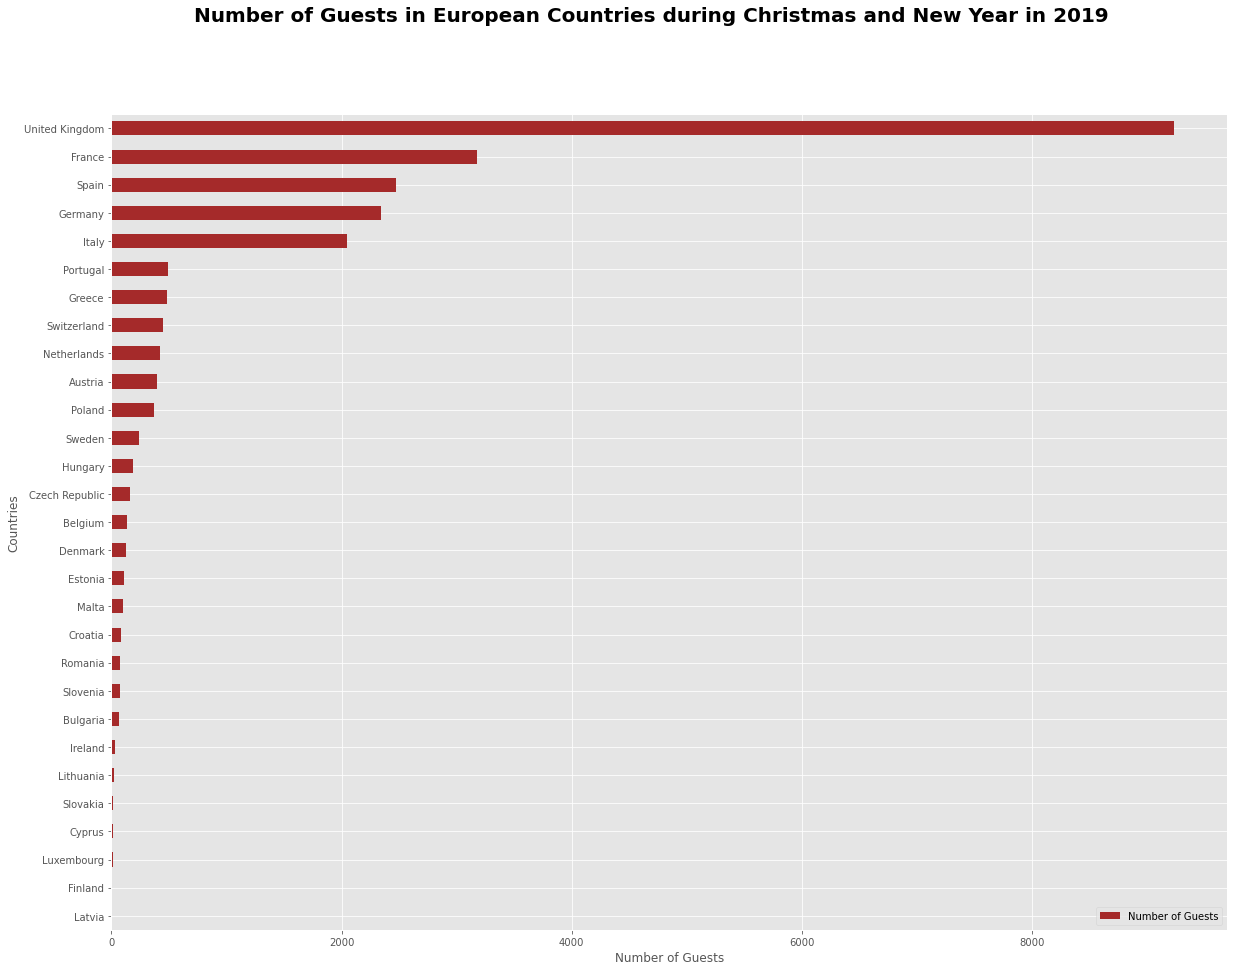

In [17]:
# Your code to answer Question 3

'''To get the data for horizontal bar plot'''

df_Xmas = df_Success.loc[(df_Success['reservation date'].dt.month==12)\
                         &(df_Success['reservation date'].dt.day>=18),:].copy()
# 'df_Xmas' is a DF that only includes dates during Christmas and New Year (from 12/18/2019–12/31/2019).

df_Xmas_country = df_Xmas.merge(Property_details, how='left', left_on='propertycode', right_on='propertyid')
# 'df_Xmas_country' is a DF to add country information to 'df_Xmas'.

df_guests = pd.DataFrame(df_Xmas_country.groupby(by=['country'])['guests'].sum())
# 'df_guests' is a DF to get total number of guests for each country during Christmas and New Year.

df_guests.sort_values(by='guests', inplace=True, ascending=True)
df_guests.reset_index(inplace=True)



'''To create the horizontal bar plot'''

fig,ax = plt.subplots(figsize=[20,15])
df_guests.plot(kind='barh', y='guests', x='country', label='Number of Guests', color='brown', ax=ax)
fig.suptitle('Number of Guests in European Countries during Christmas and New Year in 2019', \
             fontsize=20, fontweight='bold')
ax.legend(loc=4)
ax.set(xlabel='Number of Guests', ylabel='Countries')

The max total service score is 49.


Text(0.5, 1.0, 'Room Class Percentage during Christmas and New Year')

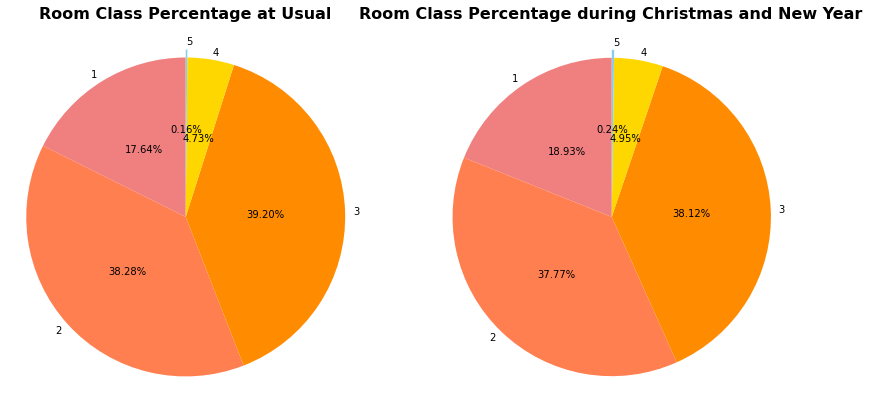

In [18]:
# Your code to answer Question 4

df_score = df_Success.copy()
# Copy 'df_Success' to 'df_score' to analyze based on 'df_Success', however keep 'df_Success' unchanged.



'''To calculate RATE SCORE'''

L_years = ['2019','2020']

# Establish 'check_free_cancel' function to delete the date in some rows in 'ratetype' column.
def check_free_cancel(ratetype):
    if ratetype is np.nan:
        ratetype = ''
    for year in L_years:
        if year in ratetype:
            i = len('free cancellation')
            j = ratetype.find(year) + 4
            ratetype = ratetype[:i] + ratetype[j:]
            break
    return ratetype

# To update the 'ratetype' column.
df_score['ratetype'] = df_score.ratetype.apply(check_free_cancel)


# Establish 'get_rate_score' function to count the number of ratetypes (service policies) for each successed order.
def get_rate_score(ratetype):
    if ratetype == '':
        score = 0
    else:
        ratetypes = ratetype.split(',')
        score = len(ratetypes)
    return score

# To create the 'rate score' column.
df_score['rate score'] = df_score.ratetype.apply(get_rate_score)



'''To calculate AMENITY SCORE'''

# Establish 'get_amenity_score' function to count the number of amenities for each successed order.
def get_amenity_score(amenity):
    if amenity is np.nan:
        score = 0
    else:
        amenities = amenity.strip(': ;').split(': ;')
        score = len(amenities)
    return score

# To create the 'amenity score' column.
df_score['amenity score'] = df_score.roomamenities.apply(get_amenity_score)



'''To calculate MEAL SCORE'''

# Since we have to create category ourselves for 'mealinclusiontype' column (due to the lack of delimiter),
# we first lowercased the column to correctly and more easily classify.
df_score['mealinclusiontype'] = df_score.mealinclusiontype.str.lower()

# Below is to observe all types included in 'mealinclusiontype' for further classification.
# (We hide this to make the result clear.)
# print(df_score.mealinclusiontype.value_counts())

L_meal = ['breakfast','lunch','dinner','free wifi','beverages','parking','park tickets','pay','wine','water']
# 'L_meal' is a list of meal-inclusion types except 'all inclusive' (created by observing the value_counts above).

meal_top_score = len(L_meal)
# 'meal_top_score' shows the score for 'all inclusive'.


# Establish 'get_meal_score' function to count the number of meal service for each successed order.
def get_meal_score(mealtype):
    if mealtype is np.nan:
        mealtype = ''
    score = 0
    if mealtype == 'all inclusive':
        score = meal_top_score
    else:
        for meal in L_meal:
            if meal in mealtype:
                score += 1
    return score

# To create the 'meal score' column.
df_score['meal score'] = df_score.mealinclusiontype.apply(get_meal_score)



'''To calculate TOTAL SERVICE SCORE'''

# To create the 'total service score' column.
df_score['total service score'] = df_score['rate score'] + df_score['amenity score'] + df_score['meal score']

# To show the max total service score for better classification.
print('The max total service score is %d.' %df_score['total service score'].max())



'''To classify the total service score into 5 classes. 1–5: from worst to best.'''

# Establish 'classify' function to classify the 'total service score' into 5 categories.
def classify(score):
    if score <= 10:
        return 1
    elif score <= 20:
        return 2
    elif score <= 30:
        return 3
    elif score <= 40:
        return 4
    else:
        return 5

# To create the 'service class' column.
df_score['service class'] = df_score['total service score'].apply(classify)



'''To split df_score into Xmas and usual (non-Xmas) period'''

df_score_Xmas = df_score.loc[(df_score['reservation date'].dt.month==12)\
                             &(df_score['reservation date'].dt.day>=18),:].copy()
# 'df_score_Xmas' is a DF shows reservation date only during Christmas and New Year.

df_score_usual = df_score.loc[(df_score['reservation date'].dt.month!=12)\
                              |(df_score['reservation date'].dt.day<18),:].copy()
# 'df_score_usual' is a DF shows reservation date not at Christmas or New Year.



'''To get the data for pie plots'''

df_1 = pd.DataFrame(df_score_Xmas['service class'].value_counts())
# 'df_1' is a temporary DF to show distribution of service class during Christmas and New Year.

df_1.reset_index(inplace=True)
df_1.sort_values(by='index', inplace=True, ascending=True)

size_Xmas = [row['service class'] for index, row in df_1.iterrows()]
# 'size_Xmas' is a list of the distribution of service class during Christmas and New Year, ordering as Class 1–5.


df_2 = pd.DataFrame(df_score_usual['service class'].value_counts())
# 'df_2' is a temporary DF to show distribution of service class at usual.

df_2.reset_index(inplace=True)
df_2.sort_values(by='index', inplace=True, ascending=True)

size_usual = [row['service class'] for index, row in df_2.iterrows()]
# 'size_usual' is a list of the distribution of service class at usual, ordering as Class 1–5.



'''To create the pie plots'''

fig,axes = plt.subplots(1,2,figsize=[14,7])

labels = [1,2,3,4,5]
colors = ['lightcoral','coral','darkorange','gold','skyblue']
explode = (0,0,0,0,0.05)

axes[0].pie(size_usual, colors=colors, labels=labels, explode=explode, autopct='%.2f%%', shadow=False, \
            startangle=90, pctdistance=0.5, labeldistance =1.05)
axes[0].axis('equal')
axes[0].set_title('Room Class Percentage at Usual', fontsize=16, fontweight='bold')

axes[1].pie(size_Xmas, colors=colors, labels=labels, explode=explode, autopct='%.2f%%', shadow=False, \
            startangle=90, pctdistance=0.5, labeldistance =1.05)
axes[1].axis('equal')
axes[1].set_title('Room Class Percentage during Christmas and New Year', fontsize=16, fontweight='bold')

The largest room size is 300 square meters.


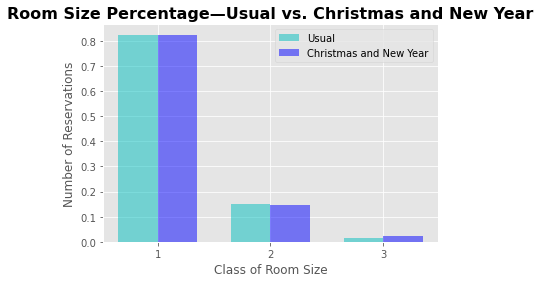

In [19]:
# Your code to answer Question 5

df_roomsize = df_Success.loc[df_Success.ratedescription.str.contains('Room size'),:].copy()
# 'df_roomsize' is a DF that filters out the rows that lack room-size information.



'''To extract ROOM SIZE information'''

# Establish 'get_size' function to get the room size of each successed order with such information.
def get_size(description):
    index_1 = len('Room size: ')
    index_2 = description.find(' m')
    return int(description[index_1:index_2])

# To create the 'room size' column.
df_roomsize['room size'] = df_roomsize.ratedescription.apply(get_size)

# To show the max room size for better classification.
print('The largest room size is %d square meters.' %df_roomsize['room size'].max())



'''To classify the room size into 10 classes. 1–10: from smallest to largest.'''

def classify_2(room_size):
    D_size = {range(0,31):1, range(31,61):2, range(61,91):3, range(91,121): 4, range(121,151):5, \
             range(151,181):6, range(181,211):7, range(211,241):8, range(241,271):9, range(271,301):10}
    for size in D_size:
        if room_size in size:
            return D_size[size]
            break
            
# To create the 'room class' column.
df_roomsize['room class'] = df_roomsize['room size'].apply(classify_2)



'''To split df_roomsize into Xmas and usual (non-Xmas) period'''

df_size_Xmas = df_roomsize.loc[(df_roomsize['reservation date'].dt.month==12)\
                               &(df_roomsize['reservation date'].dt.day>=18),:].copy()
# 'df_size_Xmas' is a DF shows reservation date only during Christmas and New Year.

df_size_usual = df_roomsize.loc[(df_roomsize['reservation date'].dt.month!=12)\
                                |(df_roomsize['reservation date'].dt.day<18),:].copy()
# 'df_size_usual' is a DF shows reservation date not at Christmas or New Year.



'''To get the data for pie plots'''

df_3 = pd.DataFrame(df_size_Xmas['room class'].value_counts()/sum(df_size_Xmas['room class'].value_counts()))
# 'df_3' is a temporary DF to show distribution of room class during Christmas and New Year.

df_3.reset_index(inplace=True)
df_3.sort_values(by='index', inplace=True, ascending=True)

# We found it difficult to show all-10-classes result in one plot.
# Because of the great difference, it would be hard to observe Class 4–10.
y_Xmas_1 = [row['room class'] for index, row in df_3.iterrows() if row['index'] in [1,2,3]]
# 'y_Xmas_1' is a list of the distribution of room class during Christmas and New Year, Class 1–3.
y_Xmas_2 = [row['room class'] for index, row in df_3.iterrows() if row['index'] not in [1,2,3]]
# 'y_Xmas_2' is a list of the distribution of room class during Christmas and New Year, Class 4–10.
y_Xmas_2.append(0) # Because we found at Christmas there is no reservation for Class-10-size rooms.


df_4 = pd.DataFrame(df_size_usual['room class'].value_counts()/sum(df_size_usual['room class'].value_counts()))
# 'df_4' is a temporary DF to show distribution of room class at usual.

df_4.reset_index(inplace=True)
df_4.sort_values(by='index', inplace=True, ascending=True)

y_usual_1 = [row['room class'] for index, row in df_4.iterrows() if row['index'] in [1,2,3]]
# 'y_usual_1' is a list of the distribution of room class at usual, Class 1–3.
y_usual_2 = [row['room class'] for index, row in df_4.iterrows() if row['index'] not in [1,2,3]]
# 'y_usual_2' is a list of the distribution of room class at usual, Class 4–10.



'''To create the bar plot, Class 1–3'''

x1 = np.arange(3)

bar_width = 0.35
tick_label = [1,2,3]


plt.bar(x1, y_usual_1, bar_width, align="center", color="c", label="Usual", alpha=0.5)
plt.bar(x1+bar_width, y_Xmas_1, bar_width, color="b", align="center", label="Christmas and New Year", alpha=0.5)

plt.xlabel('Class of Room Size')
plt.ylabel('Number of Reservations')

plt.xticks(x1+bar_width/2, tick_label)

plt.title('Room Size Percentage—Usual vs. Christmas and New Year', fontsize=16, fontweight='bold')
plt.legend(loc=0)


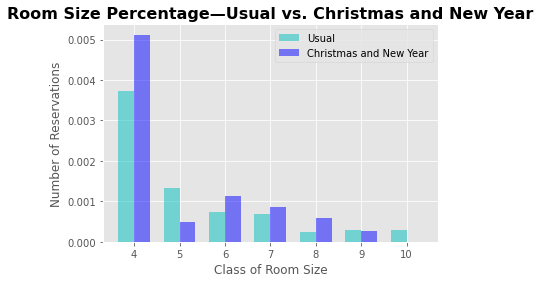

In [20]:

'''To create the bar plot, Class 4–10'''

x2 = np.arange(7)

bar_width = 0.35
tick_label = [4,5,6,7,8,9,10]

plt.bar(x2, y_usual_2, bar_width, align="center", color="c", label="Usual", alpha=0.5)
plt.bar(x2+bar_width, y_Xmas_2, bar_width, color="b", align="center", label="Christmas and New Year", alpha=0.5)

plt.xlabel('Class of Room Size')
plt.ylabel('Number of Reservations')

plt.xticks(x2+bar_width/2, tick_label)

plt.title('Room Size Percentage—Usual vs. Christmas and New Year', fontsize=16, fontweight='bold')
plt.legend(loc=0)

## Executive Summary & Business insights:


**(You need to use the cell below to write your executive summary & business insights)**
Note: If you need more space use enter to go to the next line.


The period around Christmas and New Year is so a special one in a year, and also is a time for companies to boost their sales and raise the bottom line. From the results we obtained, we drew some conclusions and made some recommendations for the hotel：

***(Question 1) First of all, hotel prices go up before Christmas, consistent with our common sense.*** 
As we can see from the price curve, hotel prices suddenly increase, especially from the week before Christmas, but gradually decrease a little bit relatively as the time gets closer to Christmas and New Year. 
    
***(Question 2) However, there are fewer discounts during the Christmas and New Year periods compared to other times of the year.***
We know that price and demand are positively correlated from the price-demand curve in economics. Therefore, during the popular time, the demand is high, and the rooms can still be sold even without a discount. So Hotels can increase their prices around a week before Christmas in this competitive market and reduce the discount as it may only reduce sales revenue.

***(Question 3) In addition, most tourists still concentrate in a few economically developed countries in Western Europe like the United Kingdom, France, Germany, and Spain.***
The demand for the hotel is high in these countries, which are good locations for the next step expansion of the hotel. Actually, the hotel occupancy saturation rate can be used to find the target for expansion better, but since there is no relevant data in the database that can calculate the saturation rate, hotels can further observe the number of existing hotels in those popular countries with many tourists before expanding.

***(Question 4, 5) Finally, we found slight increase in the guests’ percentage in the high “service score” room and the larger room at level 4–8 (top level is 10) during Christmas and New Year.***
During this time, hotels can focus on promoting family rooms with a wide range of amenities to attract customers and increase the price of this type of room slightly to gain more revenue, as customers are relatively price-insensitive during this period.*

PART 1 - Question Points: 
1a - 2 points;
1b - 1 point;
2a - 3 points;
2b - 2 points;
3a - 3 points;
3b - 1 point;
4a - 3 points;
4b - 4 points;
5a - 3 points;
5b - 3 points;
Bonus(a) - 1 point;
Bonus(b) - 1 point;

PART 2 - 
9 points total


Good Luck!